In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size':12})

In [2]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


**add another column that contains the house prices which in scikit learn datasets are considered as target**

In [7]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
newX = boston_df.drop('Price',axis =1)
print("Price column dropped\n")

print(newX.head(3))

newY = boston_df['Price']
print("New target created\n")
print(newY.head(3))

Price column dropped

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
New target created

0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size= 0.3, random_state = 3)
print(len(X_test), len(y_test))

152 152


### Ridge Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
rr = Ridge(alpha = 0.01)
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

> **higher the alpha value, more restriction on the coefficients; **
> **low alpha > more generalization, coefficients are barely
restricted **
in this case linear and ridge regression are similar

In [22]:
rr100 = Ridge(alpha =100) #comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)

In [24]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test,y_test)

In [25]:
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test,y_test)

In [26]:
print("linear regression train_score",train_score)
print("linear regression test_score",test_score)

linear regression train_score 0.7419034960343789
linear regression test_score 0.7146895989294313


In [27]:
print("Ridge regression train_score",Ridge_train_score)
print("Ridge regression test_score",Ridge_test_score)

Ridge regression train_score 0.7419030253527293
Ridge regression test_score 0.7145115044376257


In [28]:
print("Ridge regression 100 train_score",Ridge_train_score100)
print("Ridge regression 100 test_score",Ridge_test_score100)

Ridge regression 100 train_score 0.7172809669938278
Ridge regression 100 test_score 0.6805838894730998


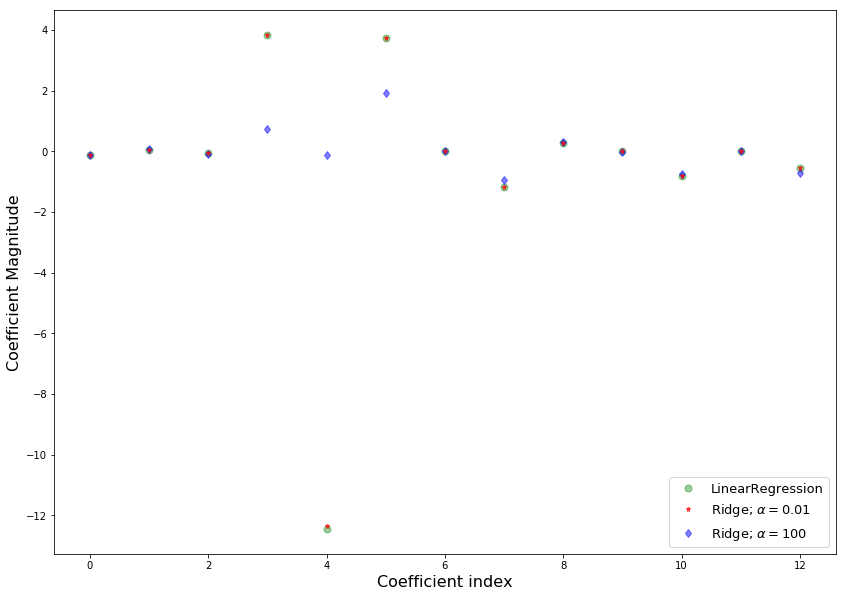

In [32]:
plt.figure(figsize = (14,10))

plt.plot(lr.coef_, alpha = 0.4, linestyle = 'none', marker = 'o', markersize = 7, color = 'green', label = 'LinearRegression')

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

plt.xlabel("Coefficient index", fontsize = 16)
plt.ylabel("Coefficient Magnitude", fontsize = 16)
plt.legend(fontsize =13, loc = 4)
plt.show()

>In X axis we plot the coefficient index and for Boston data there are 13 features (for Python 0th index refers to 1st feature). 

>For low value of alpha (0.01), when the coefficients are less restricted, the coefficient magnitudes are almost same as of linear regression. 

>For higher value of alpha (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. 

>This is an example of shrinking coefficient magnitude using Ridge regression.

### Lasso Regression

**Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.**

> Just like Ridge regression the regularization parameter (lambda) can be controlled and we will see the effect below using cancer data set in sklearn. 

> I am using cancer data instead of Boston house data, that I have used before, is, cancer data-set have 30 features compared to only 13 features of Boston house data. 

> So feature selection using Lasso regression can be depicted well by changing the regularization parameter.

In [33]:
import math

# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split

In [35]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
print("Data loaded")

Data loaded


In [36]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
X = cancer.data
Y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 31)

lasso = Lasso()

lasso.fit(X_train, y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
coeff_used = np.sum(lasso.coef_ != 0)

print("Training score: ",train_score )
print("Test score: ", test_score)
print("No. of features used: ", coeff_used)

Training score:  0.5600974529893079
Test score:  0.5832244618818156
No. of features used:  4


In [40]:
lasso001 = Lasso(alpha =0.01, max_iter = 10e5)
lasso001.fit(X_train, y_train)

train_score001 = lasso001.score(X_train, y_train)
test_score001 = lasso001.score(X_test, y_test)                                
coeff_used001 = np.sum(lasso001.coef_ != 0)

print("Training score: ",train_score001 )
print("Test score: ", test_score001)
print("No. of features used for alpha = 0.01: ", coeff_used001)

Training score:  0.7037865778498829
Test score:  0.6641831577726228
No. of features used for alpha = 0.01:  10


In [41]:
lasso00001 = Lasso(alpha =0.0001, max_iter = 10e5)
lasso00001.fit(X_train, y_train)

train_score00001 = lasso00001.score(X_train, y_train)
test_score00001 = lasso00001.score(X_test, y_test)                                
coeff_used00001 = np.sum(lasso00001.coef_ != 0)

print("Training score: ",train_score00001 )
print("Test score: ", test_score00001)
print("No. of features used for alpha = 0.00001: ", coeff_used00001)

Training score:  0.7754092006936697
Test score:  0.7318608210757909
No. of features used for alpha = 0.00001:  22


In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lt_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

print("LinearRegression training score: ", lt_train_score)
print("LinearRegression test score: ", lr_test_score)

LinearRegression training score:  0.7842206194055069
LinearRegression test score:  0.7329325010888681


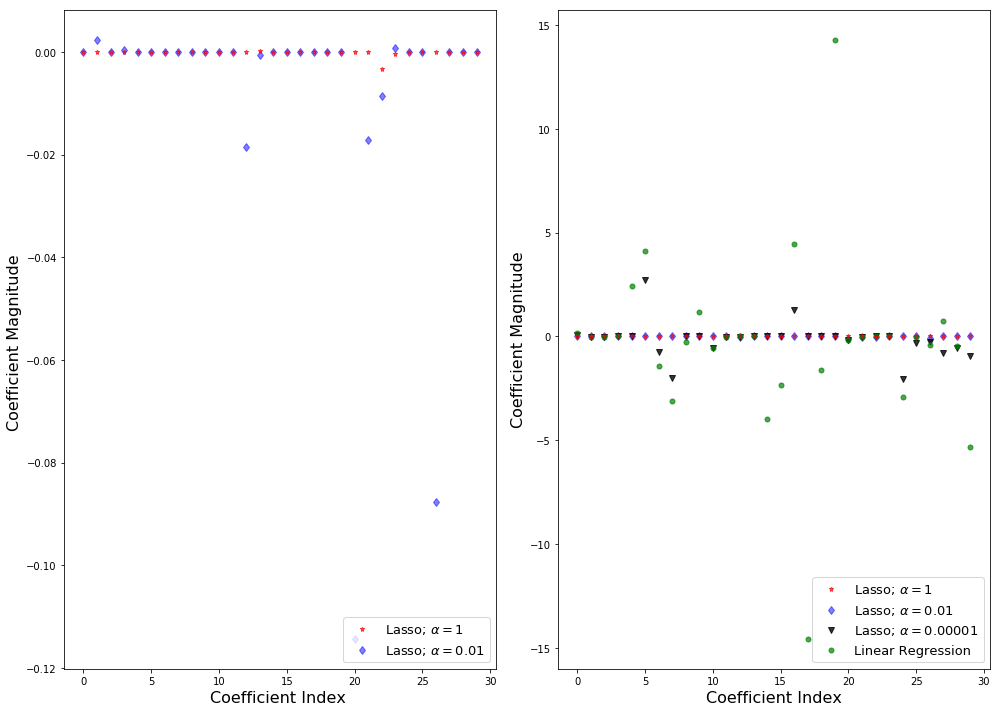

In [44]:
plt.figure(figsize = (14,10))

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel("Coefficient Index ",fontsize = 16 )
plt.ylabel("Coefficient Magnitude ",fontsize = 16 )
plt.legend(fontsize =13, loc =4)

plt.subplot(1,2,2)

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

**The plot and the code in a short summary.**

 - The default value of regularization parameter in Lasso regression (given by alpha) is 1.
 - With this, out of 30 features in cancer data-set, only 4 features are used (non zero value of the coefficient).
 - Both training and test score (with only 4 features) are low; conclude that the model is under-fitting the cancer data-set.
 - Reduce this under-fitting by reducing alpha and increasing number of iterations. Now alpha = 0.01, non-zero features =10, training and test score increases.
 - Comparison of coefficient magnitude for two different values of alpha are shown in the left panel of figure 2. 
 - For alpha =1, we can see most of the coefficients are zero or nearly zero, which is not the case for alpha=0.01.
 - Further reduce alpha =0.0001, non-zero features = 22. Training and test scores are similar to basic linear regression case.
 - In the right panel of figure, for alpha = 0.0001, coefficients for Lasso regression and linear regression show close resemblance.

**Let’s summarize**

 - Cost function of Ridge and Lasso regression and importance of regularization term.
 - Went through some examples using simple data-sets to understand Linear regression as a limiting case for both Lasso and Ridge regression.
 - Understood why Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.